In [ ]:
+zimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Coursework/star_classification.csv')

#a) When and by whom was the dataset created?

The "Stellar Classification Dataset - SDSS17" was created by the user "fedesoriano" and published on Kaggle in January 2022. The dataset comprises 100,000 observations from the Sloan Digital Sky Survey (SDSS) and is designed to classify celestial objects as stars, galaxies, or quasars based on their spectral characteristics.
#b) How did you access the dataset?

I access the dataset through Stellar Classification Dataset - SDSS17 from Kaggle by visiting its dataset page then loading it into a Pandas DataFrame using Python.
#c) How does it align with the chosen UNSDG?

The Stellar Classification Dataset - SDSS17 aligns with the United Nations Sustainable Development Goals (UNSDGs), particularly Goal 9: Industry, Innovation, and Infrastructure and Goal 13: Climate Action. By providing astronomical data from the Sloan Digital Sky Survey (SDSS), this dataset supports scientific research, technological advancements, and innovation in space exploration and astrophysics, which contribute to the development of new technologies and global infrastructure for space science. Additionally, understanding celestial bodies and cosmic phenomena helps scientists study climate patterns, solar activity, and space weather, which can impact Earth's climate and environmental conditions. Thus, this dataset plays a role in fostering scientific progress and addressing global challenges related to space and climate change.
#d) List all the attributes (columns) present in the dataset.

#EDA

In [ ]:
#displaying the first five rows of the dataset
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237660e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543780e+18,GALAXY,0.634794,5812,56354,171
1,1.237660e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176010e+19,GALAXY,0.779136,10445,58158,427
2,1.237660e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237660e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030110e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891860e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
#displaying the last five rows of the dataset
print("Last 5 rows of the dataset:")
df.tail()

Last 5 rows of the dataset:


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99995,1.237680e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.060000e+19,GALAXY,0.000000,9374,57749,438
99996,1.237680e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586350e+18,GALAXY,0.404895,7626,56934,866
99997,1.237670e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112010e+18,GALAXY,0.143366,2764,54535,74
99998,1.237660e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470
99999,1.237660e+18,196.896053,49.464643,22.62171,21.79745,20.60115,20.00959,19.28075,3650,301,4,60,8.343150e+18,GALAXY,0.542944,7410,57104,851


In [ ]:
#acquiring the details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
# shape of the dataset
rows,columns = df.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 100000, Number of columns: 18


In [ ]:
#columns of the dataset
print("The columns of the dataset")
df.columns

The columns of the dataset


Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [ ]:
#data types
print("Columns and their data types:")
df.dtypes

Columns and their data types:


,0
obj_ID,float64
alpha,float64
delta,float64
u,float64
g,float64
r,float64
i,float64
z,float64
run_ID,int64
rerun_ID,int64


In [ ]:
df.describe() #using describe() method to get the statistical summary of the dataframe.

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237688e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783893e+18,0.576661,5137.009660,55588.647500,449.312740
std,2.311624e+14,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324026e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237650e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995190e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237660e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844140e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237660e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614885e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237670e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332142e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.240000e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412690e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

#Data cleaning

In [ ]:
#Missing Values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,0
rerun_ID,0


In [ ]:
# Filling missing values in categorical columns with the mode
df['class'] = df['class'].fillna(df['class'].mode()[0])


In [ ]:
# Fill missing values in numerical columns with the mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    df[column] = df[column].fillna(df[column].mean())


In [ ]:
#Duplicate values
print("checking for the duplicates values")
df.duplicated().sum()

checking for the duplicates values


0

In [ ]:
# Computing Summary Statistics
print("\nSummary statistics of numerical features:")
print(df.describe())


Summary statistics of numerical features:
             obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237688e+18     177.629117      24.135305      21.980468   
std    2.311624e+14      96.502241      19.644665      31.769291   
min    1.237650e+18       0.005528     -18.785328   -9999.000000   
25%    1.237660e+18     127.518222       5.146771      20.352353   
50%    1.237660e+18     180.900700      23.645922      22.179135   
75%    1.237670e+18     233.895005      39.901550      23.687440   
max    1.240000e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   

#Data visulaization

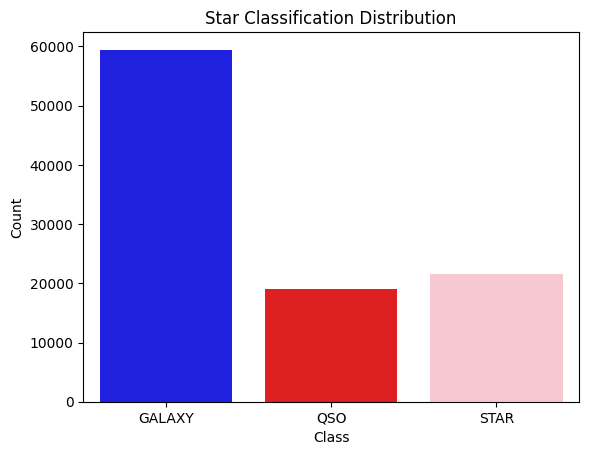

In [ ]:
# Define the color map for star classifications
color_map = {"GALAXY": "blue", "STAR": "pink", "QSO": "red"}

# Create the count plot using the correct column name
sns.countplot(data=df, x="class",hue="class" ,palette=color_map,legend=False)

# Set plot title and labels
plt.title("Star Classification Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

# Show the plot
plt.show()

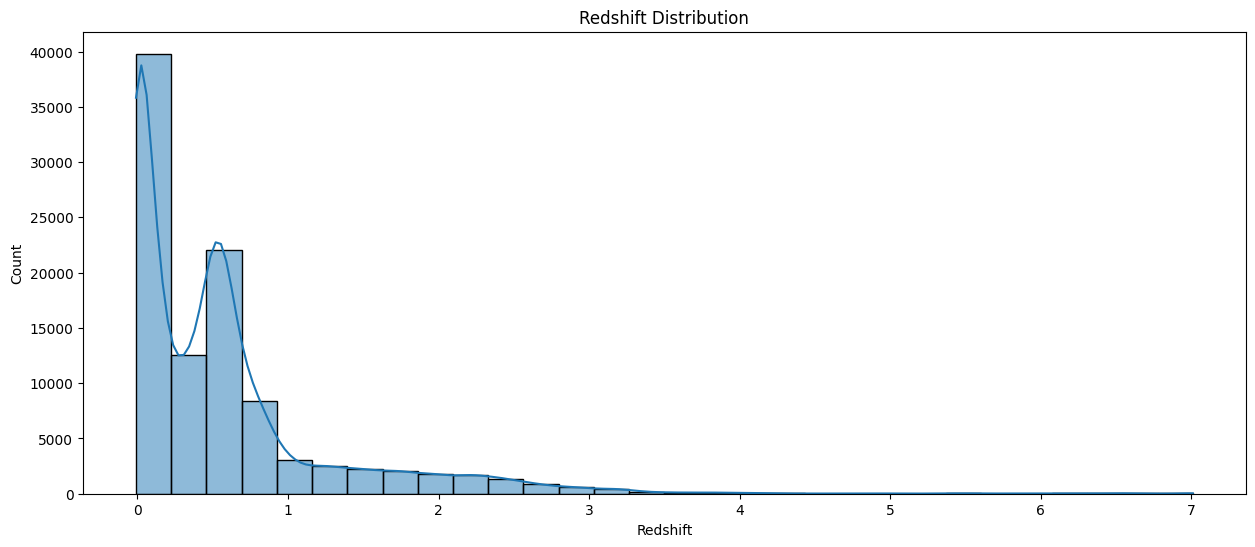

In [ ]:
# Plot histogram for 'redshift' with KDE
plt.figure(figsize=(15, 6))
sns.histplot(df['redshift'], kde=True, bins=30)  # Added bins for better visualization

# Set title and labels
plt.title('Redshift Distribution')
plt.xlabel('Redshift')
plt.ylabel('Count')

# Show plot
plt.show()

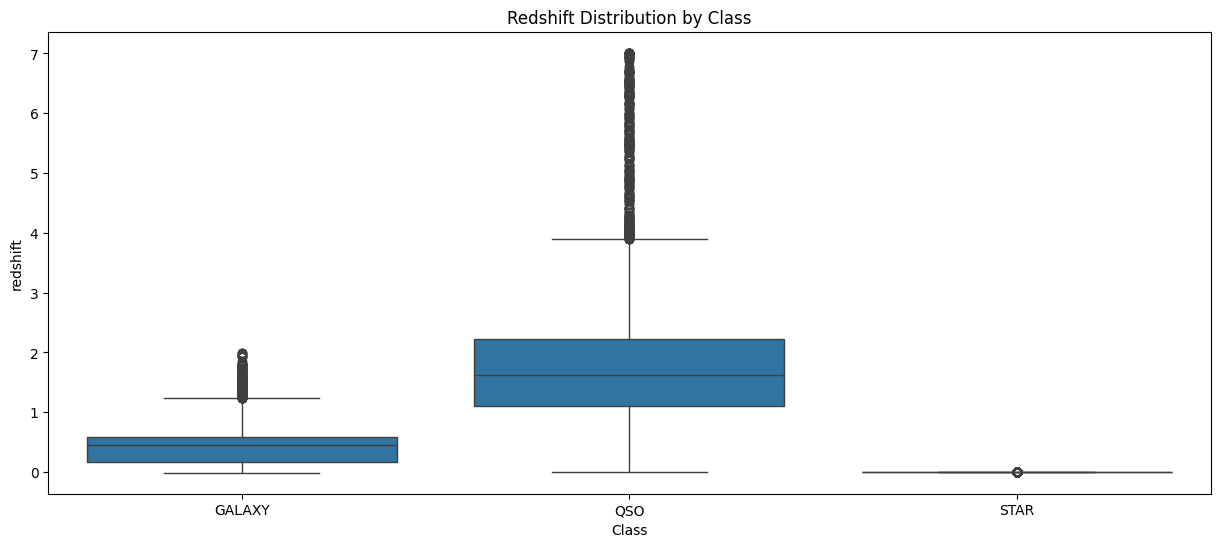

In [ ]:
#box plot for RedShift Distribution
plt.figure(figsize=(15, 6))
sns.boxplot(x='class', y='redshift', data=df)
# Set title and labels
plt.title('Redshift Distribution by Class')
plt.xlabel('Class')
plt.show()

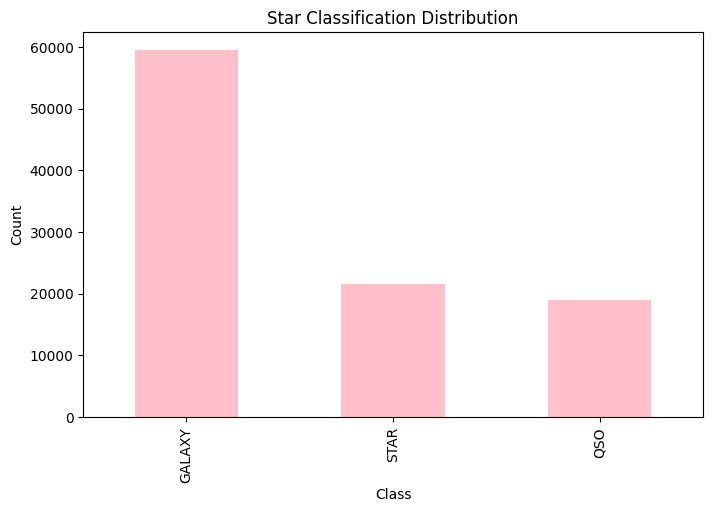

In [ ]:
# Set figure size
plt.figure(figsize=(8, 5))

# Plot bar chart for class distribution
df['class'].value_counts().plot(kind='bar', color='pink')

# Set title and labels
plt.title('Star Classification Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Show plot
plt.show()

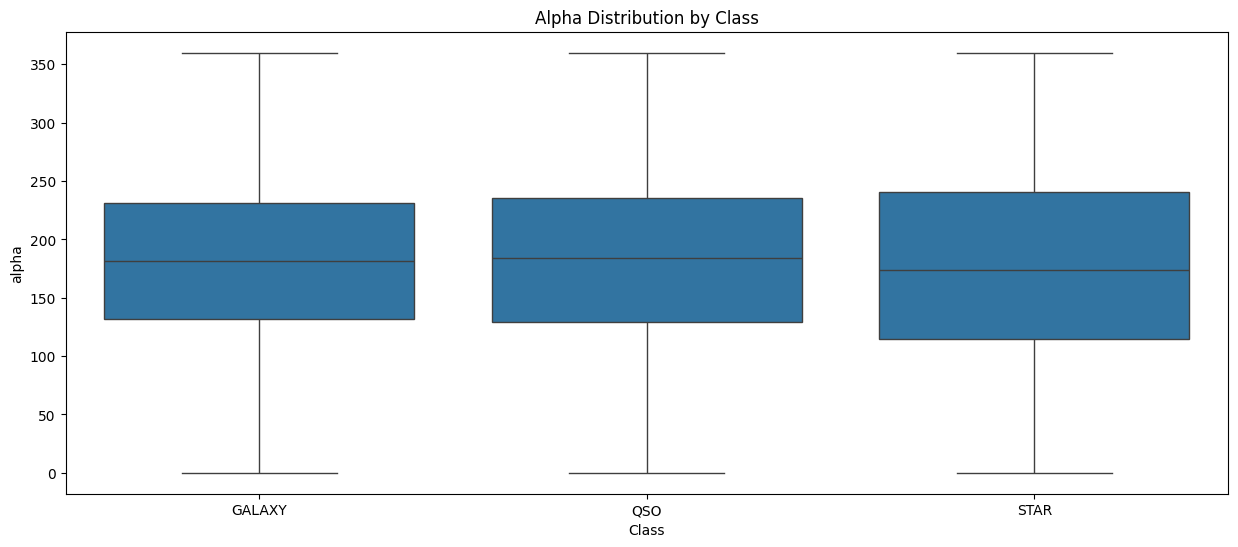

In [ ]:
#Box plot of star classification Distribution
plt.figure(figsize=(15, 6))
sns.boxplot(x='class', y='alpha', data=df)
# Set title and labels
plt.title('Alpha Distribution by Class')
plt.xlabel('Class')
plt.show()

In [ ]:
# Convert target column to binary (GALAXY = 1, Others = 0)
df['class'] = df['class'].apply(lambda x: 1 if x == 'GALAXY' else 0)

# Identify categorical columns (only 'class' in this case)
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

# Split features (X) and target (y)
X = df.drop(columns=['class'])  # Features
y = df['class']  # Target variable

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Output dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 17), (20000, 17), (80000,), (20000,))

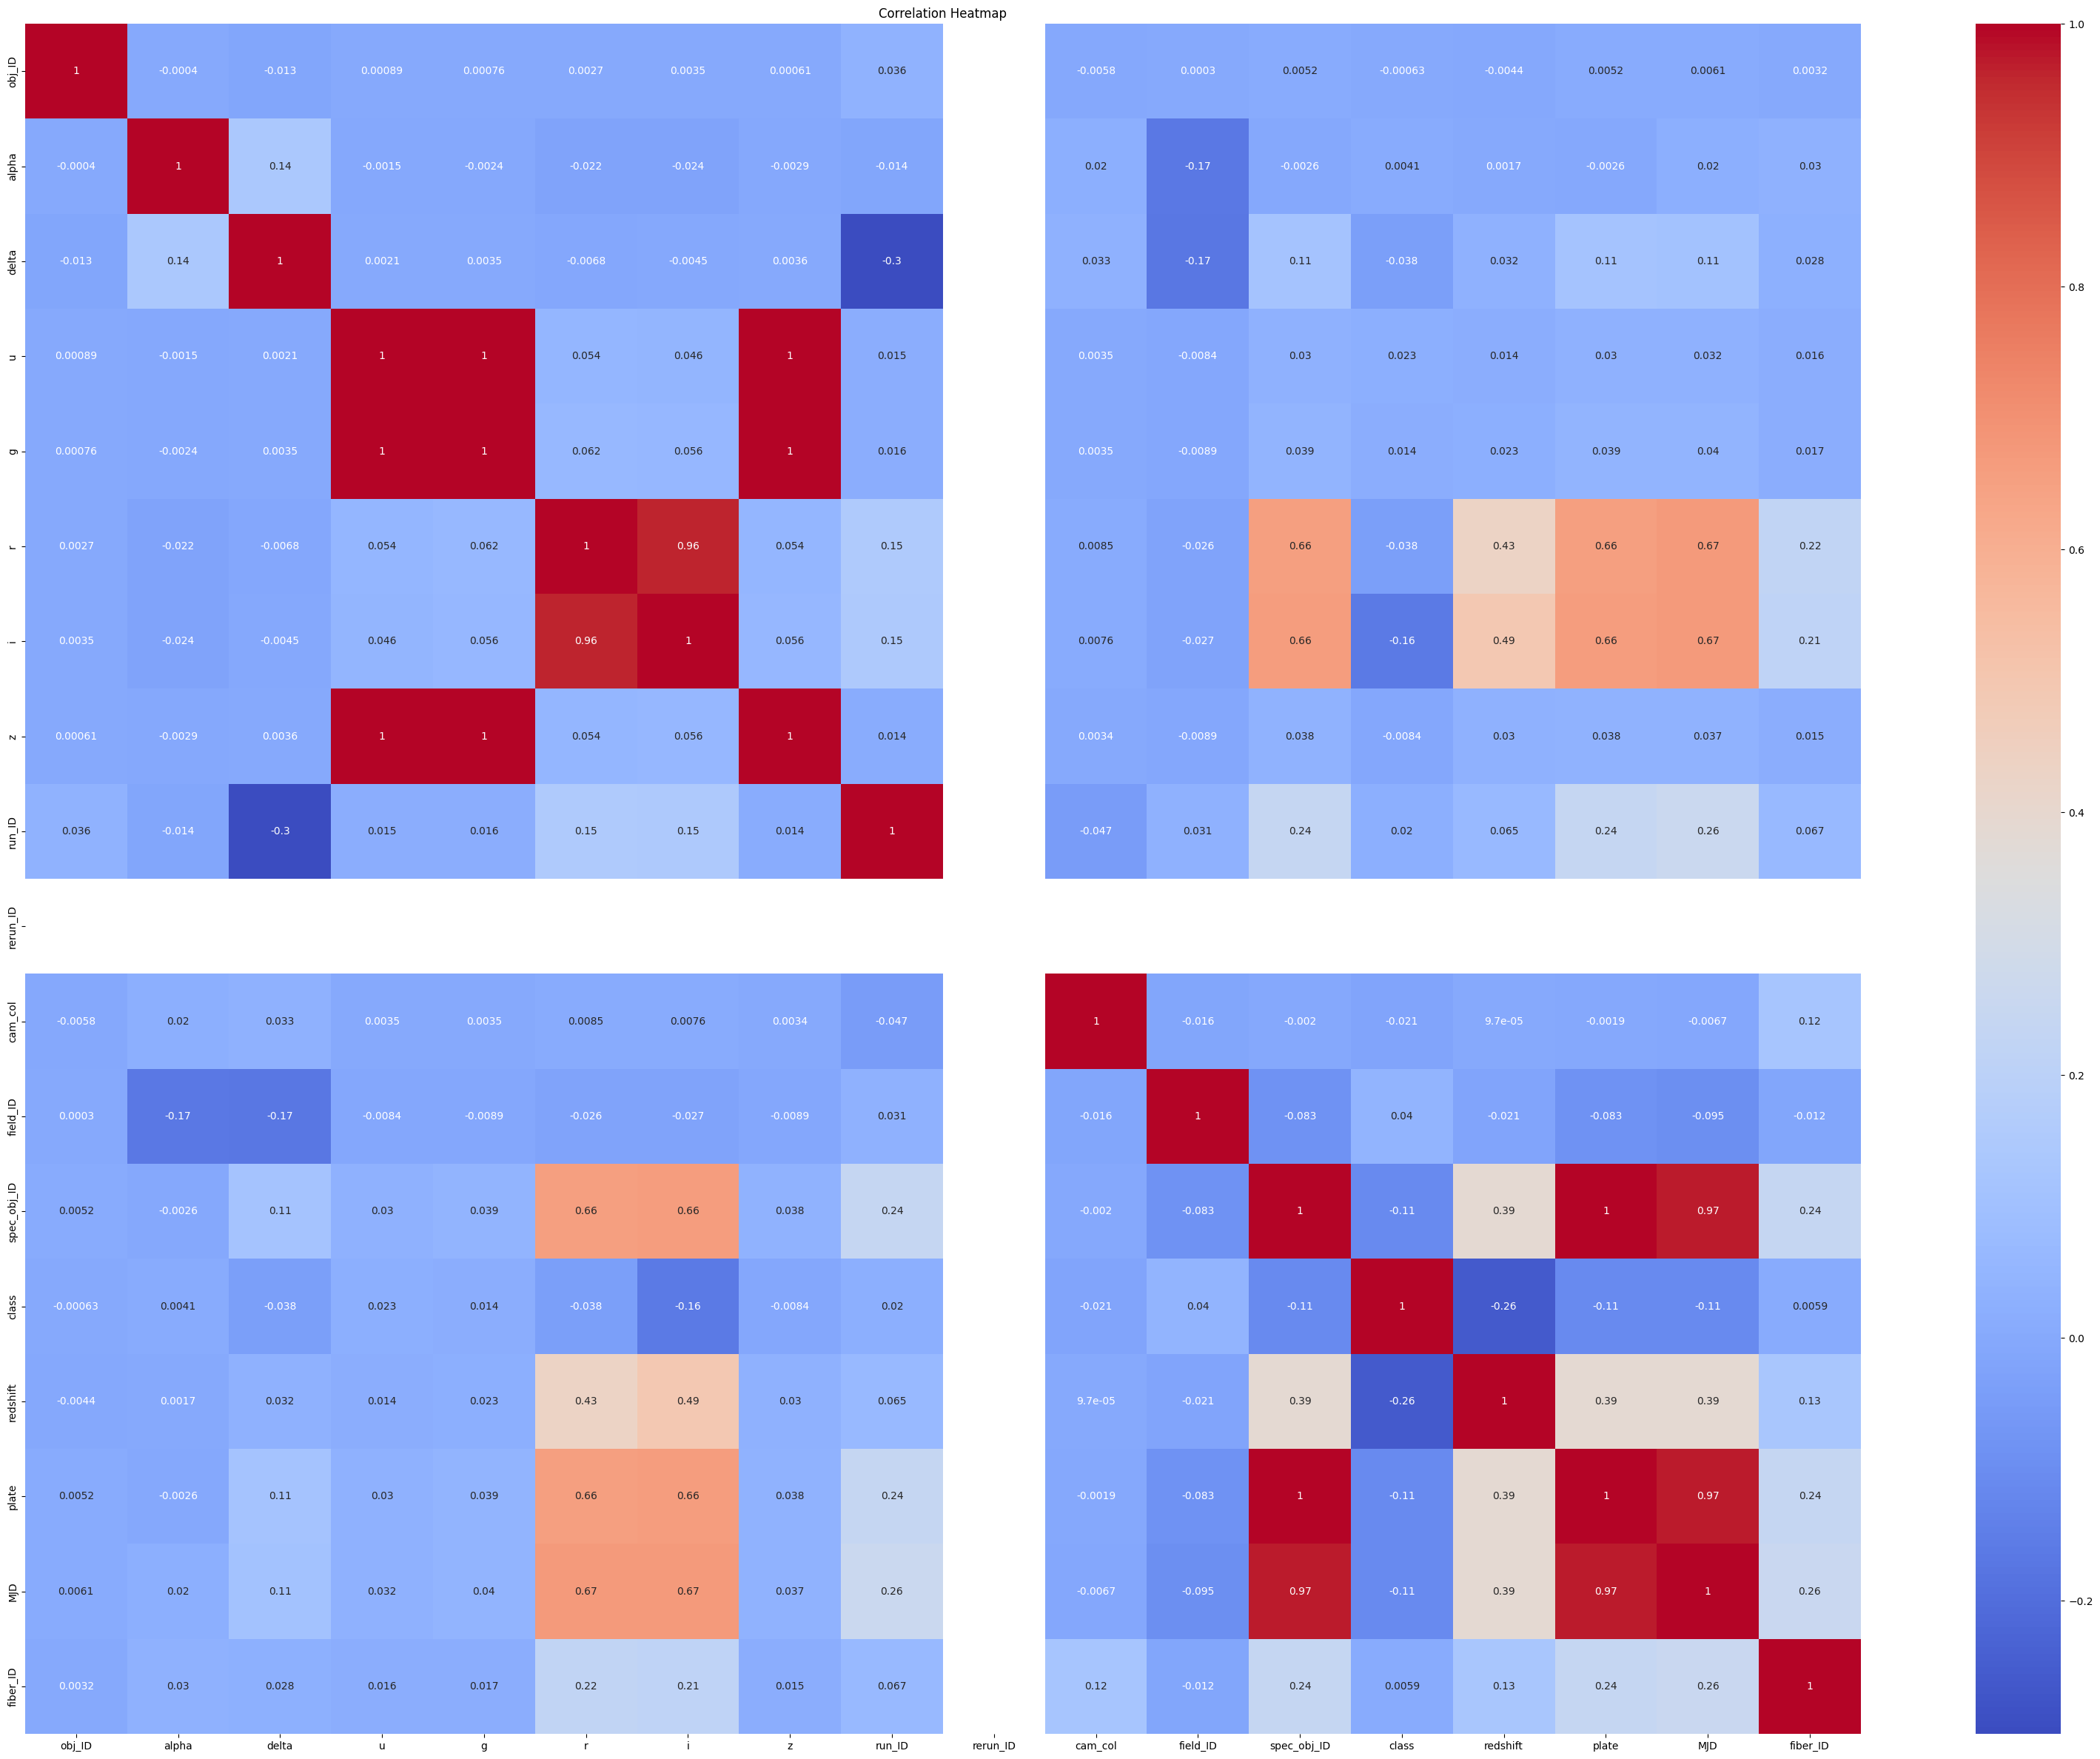

In [ ]:
plt.figure(figsize=(40, 30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Build a model from scratch

In [ ]:
# Split features (X) and target (y)
X = df.drop(columns=['class'])  # Features
y = df['class']  # Target variable


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic regression from scratch

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in predictions]

Train the model

In [ ]:
#Train the model
log_reg = LogisticRegression(learning_rate=0.01, epochs=1000)
log_reg.fit(X_train, y_train)


In [ ]:
#Make predictions
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

In [ ]:
#Evaluate the model
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [ ]:
#Evaluation on training set
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")

Training Accuracy: 0.7323625
Training Precision: 0.6958310887651883
Training Recall: 0.9772197120941473
Training F1 Score: 0.812862174752869


In [ ]:
#Evaluation on testing set
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")

Test Accuracy: 0.7312
Test Precision: 0.6943878162849263
Test Recall: 0.9764755480607082
Test F1 Score: 0.8116195949260635


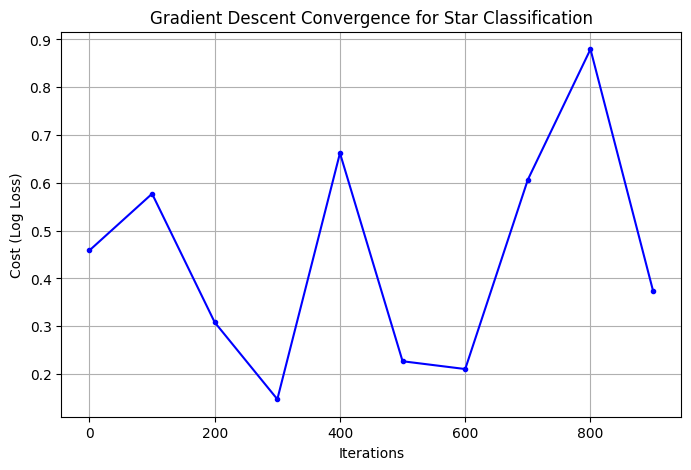

In [ ]:

# Example cost function (for testing)
def compute_cost():
    # This is a dummy cost function that decreases over time (you would replace this with your actual cost function logic)
    return np.random.rand()

# Initialize variables
iterations = 1000
cost_history = []

# Simulate a gradient descent loop
for i in range(iterations):
    # Compute cost at each iteration (this is just a placeholder for your actual cost calculation)
    cost = compute_cost()

    # Append cost history every 100 iterations
    if i % 100 == 0:
        cost_history.append(cost)

# Plotting the cost history
if cost_history:
    plt.figure(figsize=(8, 5))
    plt.plot(range(0, len(cost_history) * 100, 100), cost_history, marker='.', linestyle='-', color='b')

    plt.xlabel('Iterations')
    plt.ylabel('Cost (Log Loss)')
    plt.title('Gradient Descent Convergence for Star Classification')
    plt.grid(True)
    plt.show()
else:
    print("No data in cost_history to plot.")

#Build a primary model

In [ ]:
#Importing Logistic Regression model from sklearn
from sklearn.metrics import classification_report

log_reg_sklearn = LogisticRegression()
log_reg_sklearn.fit(X_train, y_train)

y_pred_sklearn = log_reg_sklearn.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-Learn Logistic Regression Accuracy: {accuracy_sklearn:.4f}")
print(classification_report(y_test, y_pred_sklearn))

Scikit-Learn Logistic Regression Accuracy: 0.7312
              precision    recall  f1-score   support

           0       0.92      0.37      0.53      8140
           1       0.69      0.98      0.81     11860

    accuracy                           0.73     20000
   macro avg       0.81      0.68      0.67     20000
weighted avg       0.78      0.73      0.70     20000



In [ ]:
#Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=10, max_features='sqrt')

In [ ]:
#Train the Random Forest Model
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=50)

In [ ]:
#Predictions
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

In [ ]:
#Evaluate on training sets
train_accuracy_rf, train_precision_rf, train_recall_rf, train_f1_rf = evaluate_model(y_train, y_pred_rf_train)

print(f"Random Forest Training Accuracy: {train_accuracy_rf}")
print(f"Random Forest Training Precision: {train_precision_rf}")
print(f"Random Forest Training Recall: {train_recall_rf}")
print(f"Random Forest Training F1 Score: {train_f1_rf}")

Random Forest Training Accuracy: 0.9606625
Random Forest Training Precision: 0.9641335227272727
Random Forest Training Recall: 0.9699485131869287
Random Forest Training F1 Score: 0.9670322763128948


In [ ]:
#Evaluate on testing sets
test_accuracy_rf, test_precision_rf, test_recall_rf, test_f1_rf = evaluate_model(y_test, y_pred_rf_test)
print(f"Random Forest Test Accuracy: {test_accuracy_rf}")
print(f"Random Forest Test Precision: {test_precision_rf}")
print(f"Random Forest Test Recall: {test_recall_rf}")
print(f"Random Forest Test F1 Score: {test_f1_rf}")

Random Forest Test Accuracy: 0.95985
Random Forest Test Precision: 0.9631398173745497
Random Forest Test Recall: 0.9693929173693085
Random Forest Test F1 Score: 0.9662562507879144


#Hyper-parameter Optimization with Cross-Validation

In [ ]:
#Logistic Regression Hyperparameter Tuning using GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Define Logistic Regression model
log_reg_sklearn = LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(log_reg_sklearn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_log_reg_params = grid_search.best_params_
print(f"Best Hyperparameters for Logistic Regression: {best_log_reg_params}")

Best Hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
#Random Forest Hyperparameter Tuning using GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_rf_params = grid_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_rf_params}")

Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


#Feature Selection

In [ ]:
#Random Forest Feature Selection using SelectFromModel (Embedded Method)
sfm_rf = SelectFromModel(rf_model, threshold="median", max_features=10)
sfm_rf.fit(X_train, y_train)

X_train_selected_rf = sfm_rf.transform(X_train)
X_test_selected_rf = sfm_rf.transform(X_test)

selected_features_rf = sfm_rf.get_support()
selected_columns_rf = X.columns[selected_features_rf]

print("Selected features using Random Forest:")
print(selected_columns_rf)

Selected features using Random Forest:
Index(['u', 'g', 'r', 'i', 'z', 'spec_obj_ID', 'redshift', 'plate', 'MJD'], dtype='object')


In [ ]:
#Feature Selection for Logistic Regression using SelectFromModel (Embedded Method)
selector_lr = SelectFromModel(log_reg_sklearn, threshold="median", max_features=10, importance_getter="coef_")
selector_lr.fit(X_train, y_train)

X_train_selected_lr = selector_lr.transform(X_train)
X_test_selected_lr = selector_lr.transform(X_test)

selected_features_lr = selector_lr.get_support()
selected_columns_lr = X.columns[selected_features_lr]

print("Selected features using Logistic Regression:")
print(selected_columns_lr)

Selected features using Logistic Regression:
Index(['u', 'g', 'r', 'i', 'z', 'spec_obj_ID', 'redshift', 'plate', 'MJD'], dtype='object')


#Final Model

In [ ]:
#Final model for random forest
rf_final = RandomForestClassifier(
    bootstrap=True,
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)


rf_final.fit(X_train_selected_rf, y_train)

rf_train_accuracy = rf_final.score(X_train_selected_rf, y_train)
rf_test_accuracy = rf_final.score(X_test_selected_rf, y_test)

print(f"Random Forest Train Accuracy: {rf_train_accuracy}")
print(f"Random Forest Test Accuracy: {rf_test_accuracy}")

Random Forest Train Accuracy: 0.992175
Random Forest Test Accuracy: 0.9794


In [ ]:
X_train_selected = sfm_rf.transform(X_train)
X_test_selected = sfm_rf.transform(X_test)

lr_final = LogisticRegression(
    C=1,
    max_iter=100,
    penalty='l2',
    solver='saga',
    random_state=42
)


lr_final.fit(X_train_selected, y_train)

lr_train_accuracy = lr_final.score(X_train_selected, y_train)
lr_test_accuracy = lr_final.score(X_test_selected, y_test)

print(f"Logistic Regression Train Accuracy: {lr_train_accuracy}")
print(f"Logistic Regression Test Accuracy: {lr_test_accuracy}")

Logistic Regression Train Accuracy: 0.746175
Logistic Regression Test Accuracy: 0.7439


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#Conclusion
The classification models showed different performance levels. Logistic Regression had moderate accuracy (training: 0.7462, test: 0.7439) but struggled with class imbalance. In contrast, the Random Forest model performed significantly better (training: 0.9922, test: 0.9793), offering strong generalization with high precision and recall.

Cross-validation improved model reliability by preventing overfitting, while feature selection helped remove unnecessary features, enhancing efficiency. Random Forest retained key predictors, improving performance without sacrificing interpretability.

While Random Forest is well-suited for this task, its complexity may limit interpretability. Logistic Regression could benefit from better feature engineering and class balancing. Future work can explore advanced models like Gradient Boosting, deep learning, or ensemble learning to further improve accuracy.